# K-Means algorithm

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Exploring penguins dataset

We have recieved information about a group of penguins placed in the [Palmer Archipelago](https://goo.gl/maps/AcdUwugk8CQC4x73A). Our research team, WBS Explorers School, suspects there are multiple penguins species, but we only have information about their: 

* Bill length
* Bill depth
* Flipper length
* Body mass

How can we find the different species?


In [ ]:
penguins = sns.load_dataset('penguins')
penguins.dropna(inplace=True)
penguins.drop(['species','island','sex'], axis=1, inplace=True)
penguins.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


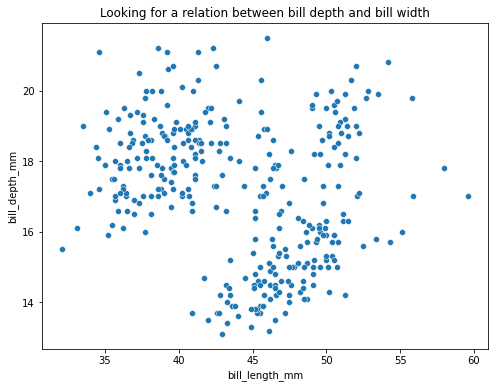

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm')
plt.title('Looking for a relation between bill depth and bill width')
plt.show()

In [ ]:
peng_cl = penguins[['bill_length_mm','bill_depth_mm']]
peng_cl.head()

,bill_length_mm,bill_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
4,36.7,19.3
5,39.3,20.6


### Data Scaling

In [ ]:
peng_cl.describe()

,bill_length_mm,bill_depth_mm
count,333.000000,333.000000
mean,43.992793,17.164865
std,5.468668,1.969235
min,32.100000,13.100000
25%,39.500000,15.600000
50%,44.500000,17.300000
75%,48.600000,18.700000
max,59.600000,21.500000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
peng_cl_norm = MinMaxScaler().fit_transform(peng_cl)

# let's see the first 5 observations after normalising the data
peng_cl_norm = pd.DataFrame(peng_cl_norm)
peng_cl_norm.columns = ['bill_length_mm','bill_depth_mm']
peng_cl_norm[:5]

,bill_length_mm,bill_depth_mm
0,0.254545,0.666667
1,0.269091,0.511905
2,0.298182,0.583333
3,0.167273,0.738095
4,0.261818,0.892857


### K-means

In [ ]:
from sklearn.cluster import KMeans

# Based on the quick look to the scatter plot, 
# we are going to assume there can be 3 different species.
kmeans = KMeans(n_clusters=3)
kmeans.fit(peng_cl_norm)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
kmeans.cluster_centers_

array([[0.64637762, 0.66703297],
       [0.54930303, 0.22480159],
       [0.24378378, 0.61357786]])

In [ ]:
cl_pos = pd.DataFrame(kmeans.cluster_centers_)
cl_pos.columns = ['bill_length_mm','bill_depth_mm']
cl_pos

,bill_length_mm,bill_depth_mm
0,0.646378,0.667033
1,0.549303,0.224802
2,0.243784,0.613578


### Explore our KMeans results

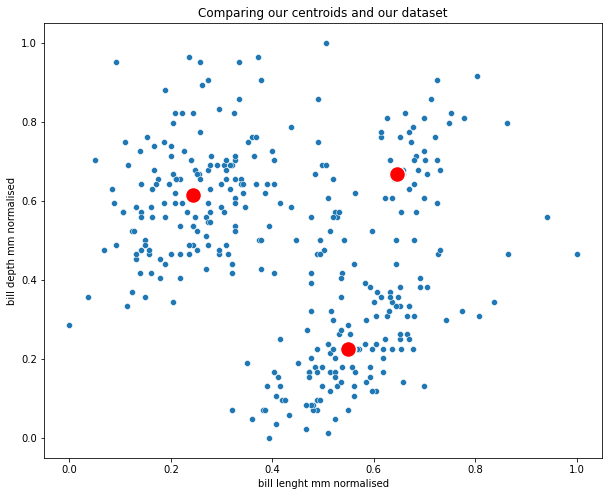

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plot_data = pd.DataFrame(peng_cl_norm)
plot_data.columns = ['bill_length_mm','bill_depth_mm']

plt.title('Comparing our centroids and our dataset')
plt.xlabel('bill lenght mm normalised')
plt.ylabel('bill depth mm normalised')
sns.scatterplot(data=plot_data, x='bill_length_mm', y='bill_depth_mm')
sns.scatterplot(data=cl_pos, x='bill_length_mm', y='bill_depth_mm', color='red', s=250)
plt.show()

In [ ]:
kmeans.predict(peng_cl_norm)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [ ]:
penguins['cluster'] = kmeans.labels_
penguins.sample(5)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,cluster
177,52.0,19.0,197.0,4150.0,2
17,42.5,20.7,197.0,4500.0,0
179,49.5,19.0,200.0,3800.0,2
85,41.3,20.3,194.0,3550.0,0
174,43.2,16.6,187.0,2900.0,1


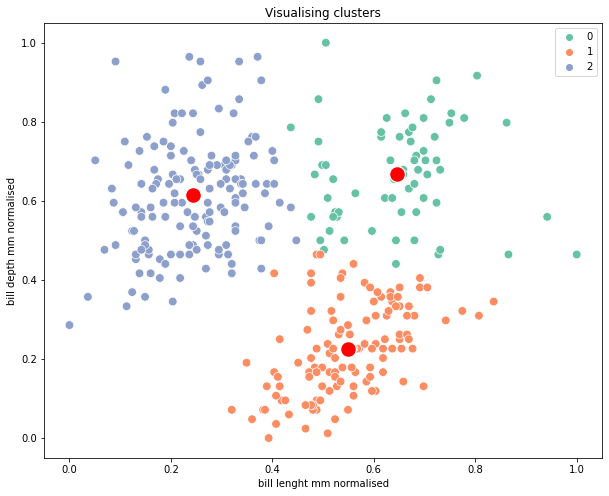

In [ ]:
# create plot dataframe
plot_data = pd.DataFrame(peng_cl_norm)
plot_data.columns = ['bill_length_mm','bill_depth_mm']
plot_data['cluster'] = kmeans.labels_

# size and plot titles
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Visualising clusters')
plt.xlabel('bill lenght mm normalised')
plt.ylabel('bill depth mm normalised')

# scatter plot
sns.scatterplot(data=plot_data, x='bill_length_mm', y='bill_depth_mm', hue='cluster', palette='Set2', s=75)
sns.scatterplot(data=cl_pos, x='bill_length_mm', y='bill_depth_mm', color='red', s=250)
plt.show()

Understanding a data science process: 

![Data Science Process](https://www.researchgate.net/publication/322310310/figure/fig1/AS:611851016601600@1522888058853/CRISP-DM-methodology-Source-Chapman-et-al-2000.png)

### 2nd iteration

In [ ]:
peng_cl_all = penguins[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
peng_cl_all.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [ ]:
from sklearn.preprocessing import StandardScaler
peng_cl_all_norm = StandardScaler().fit_transform(peng_cl_all)

kmeans_all = KMeans(n_clusters=3)
kmeans_all.fit(peng_cl_all_norm)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
kmeans_all.cluster_centers_

array([[ 0.67202511,  0.80526339, -0.28934658, -0.38410387],
       [-1.04680889,  0.48662566, -0.88169491, -0.7627539 ],
       [ 0.65475809, -1.10270671,  1.16246305,  1.10121078]])

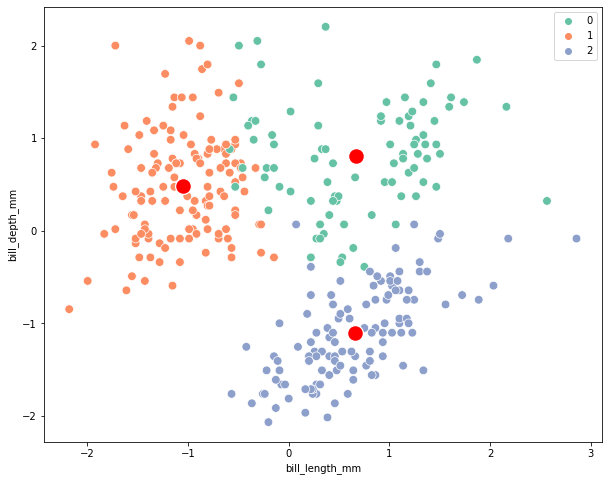

In [ ]:
cl_pos = pd.DataFrame(kmeans_all.cluster_centers_)
cl_pos.columns = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
cl_pos

fig, ax = plt.subplots(figsize=(10, 8))

plot_data = pd.DataFrame(peng_cl_all_norm)
plot_data.columns = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
plot_data['cluster'] = kmeans_all.labels_

sns.scatterplot(data=plot_data, x='bill_length_mm', y='bill_depth_mm', hue='cluster', palette='Set2', s=75)
sns.scatterplot(data=cl_pos, x='bill_length_mm', y='bill_depth_mm', color='red', s=250)
plt.show()

In [ ]:
print(cl_pos['bill_depth_mm'], cl_pos['body_mass_g'],cl_pos['bill_length_mm'])

0   -1.102707
1    0.805263
2    0.486626
Name: bill_depth_mm, dtype: float64 0    1.101211
1   -0.384104
2   -0.762754
Name: body_mass_g, dtype: float64 0    0.654758
1    0.672025
2   -1.046809
Name: bill_length_mm, dtype: float64


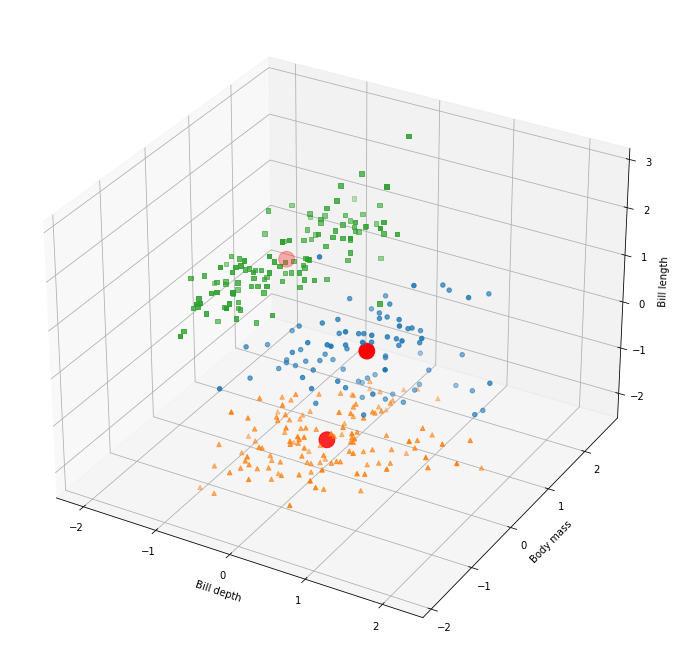

In [ ]:
import matplotlib.pyplot as plt
import random
colors = ['r','g','b']
markers = ['o', '^','s']
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

# ax.scatter(plot_data['bill_depth_mm'], plot_data['bill_length_mm'], plot_data['flipper_length_mm'])
for marker, d in plot_data.groupby('cluster'):
    ax.scatter(d['bill_depth_mm'], d['body_mass_g'], d['bill_length_mm'], marker=markers[marker], label=d['cluster'])
ax.scatter(cl_pos['bill_depth_mm'], cl_pos['body_mass_g'],cl_pos['bill_length_mm'], color='red', s=250)
ax.set_xlabel('Bill depth')
ax.set_ylabel('Body mass')
ax.set_zlabel('Bill length')
plt.show()

Another way to compare different variables is to use a spyder chart visualisation.

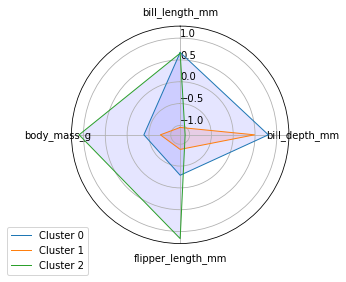

In [ ]:
# Source: https://www.python-graph-gallery.com/391-radar-chart-with-several-individuals
# Libraries
from math import pi
 
# Set data
radar_df = cl_pos.reset_index().rename(columns={'index':'cluster'})
 
# ------- PART 1: Create background
 
# number of variable
categories= radar_df.columns.tolist()[1:]
# list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks(ticks=None, labels=None)
# plt.ylim(0,40)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable

# Ind1
values=radar_df.loc[0].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 0")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind2
values=radar_df.loc[1].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 1")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=radar_df.loc[2].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 2")
ax.fill(angles, values, 'b', alpha=0.1)

# # Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()

In [ ]:
radar_df

,cluster,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0,0.654758,-1.102707,1.162463,1.101211
1,1,0.672025,0.805263,-0.289347,-0.384104
2,2,-1.046809,0.486626,-0.881695,-0.762754


Conclusion: 

Using KMeans, we were able to identify each observation to which species could belong.

![](https://i.imgur.com/orZWHly.png)

https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0090081


